Import Libraries

In [80]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Dataset Loading

In [81]:
# Load Dataset
df = pd.read_csv("D:/Internships/OASIS INFOBYTE/Projects/2-Unemployment Analysis with Python/Unemployment in India.csv")

Dataset First View

In [82]:
# View top 5 rows of the dataset
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


Dataset Rows & Columns count

In [83]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  768
Number of columns are:  7


Dataset Information

In [84]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


Duplicate Values

In [85]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 27


Missing Values/Null Values

In [86]:
# Missing Values/Null Values Count
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

<Axes: >

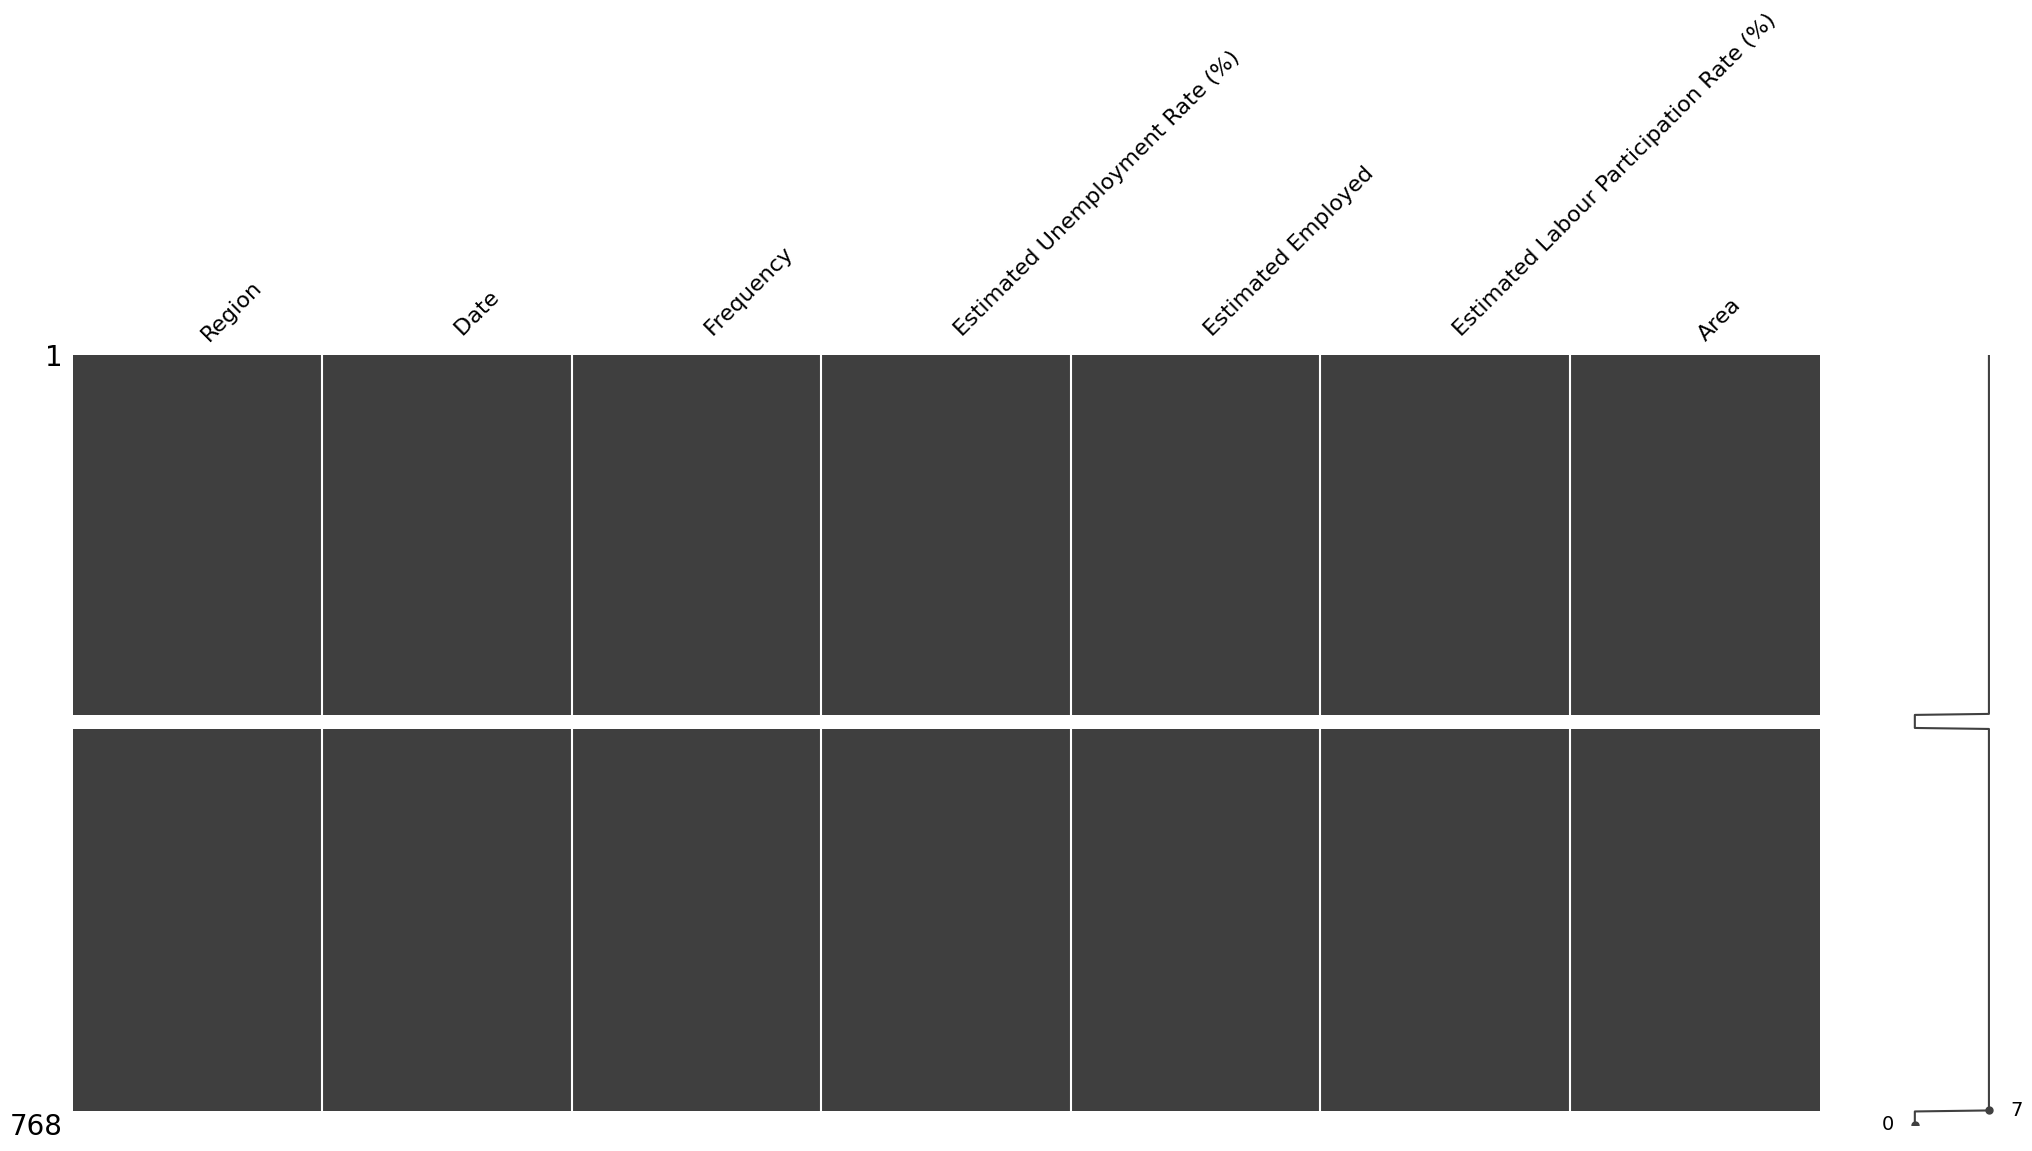

In [87]:
import missingno as msno

msno.matrix(df)

Understanding the variables


In [88]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
count,740,740,740,740.00,740.00,740.00,740
unique,28,14,2,NaN,NaN,NaN,2
top,Andhra Pradesh,31-10-2019,Monthly,NaN,NaN,NaN,Urban
freq,28,55,381,NaN,NaN,NaN,381
mean,NaN,NaN,NaN,11.79,7204460.03,42.63,NaN
std,NaN,NaN,NaN,10.72,8087988.43,8.11,NaN
min,NaN,NaN,NaN,0.00,49420.00,13.33,NaN
25%,NaN,NaN,NaN,4.66,1190404.50,38.06,NaN
50%,NaN,NaN,NaN,8.35,4744178.50,41.16,NaN
75%,NaN,NaN,NaN,15.89,11275489.50,45.50,NaN


Check Unique Values 

In [89]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Region is 28
No. of unique values in  Date is 14
No. of unique values in  Frequency is 2
No. of unique values in  Estimated Unemployment Rate (%) is 624
No. of unique values in  Estimated Employed is 740
No. of unique values in  Estimated Labour Participation Rate (%) is 626
No. of unique values in Area is 2


Data Wrangling

In [90]:
#Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region']

In [91]:
# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Region'] = df['Region'].astype('category')

In [92]:
# Convert the 'Date' column to datetime format, specifying 'dayfirst' to handle date formats with day first
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month from the 'Date' column and create a new 'Month' column
df['Month'] = df['Date'].dt.month

# Create a new 'Month_int' column by converting the 'Month' column to integers, handling missing values
df['Month_int'] = df['Month'].apply(lambda x: int(x) if pd.notna(x) else x)

In [93]:
# Drop the 'Month' column from the DataFrame
df.drop(columns='Month', inplace=True)

In [94]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

In [95]:
# Drop all the missing values from 'df' dataset
df=df.dropna()

In [96]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]

In [97]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-04-30')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

Chart - 1 : Region-wise Average Unemployment Rate 

In [98]:
# Pivot with aggregation (mean unemployment rate per region & period)
pivot_df = df_combined.pivot_table(
    index='Region', 
    columns='Period', 
    values='Estimated Unemployment Rate',
    aggfunc='mean'   # or 'median', 'max', etc.
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_df, annot=True, cmap="YlOrRd", fmt=".2f")

plt.title("Region-wise Average Unemployment Rate Before vs During Lockdown", fontsize=12)
plt.xlabel("Period")
plt.ylabel("Region")
plt.show()


KeyError: 'Region'

Chart - 2 : State-wise Unemployment Rate 

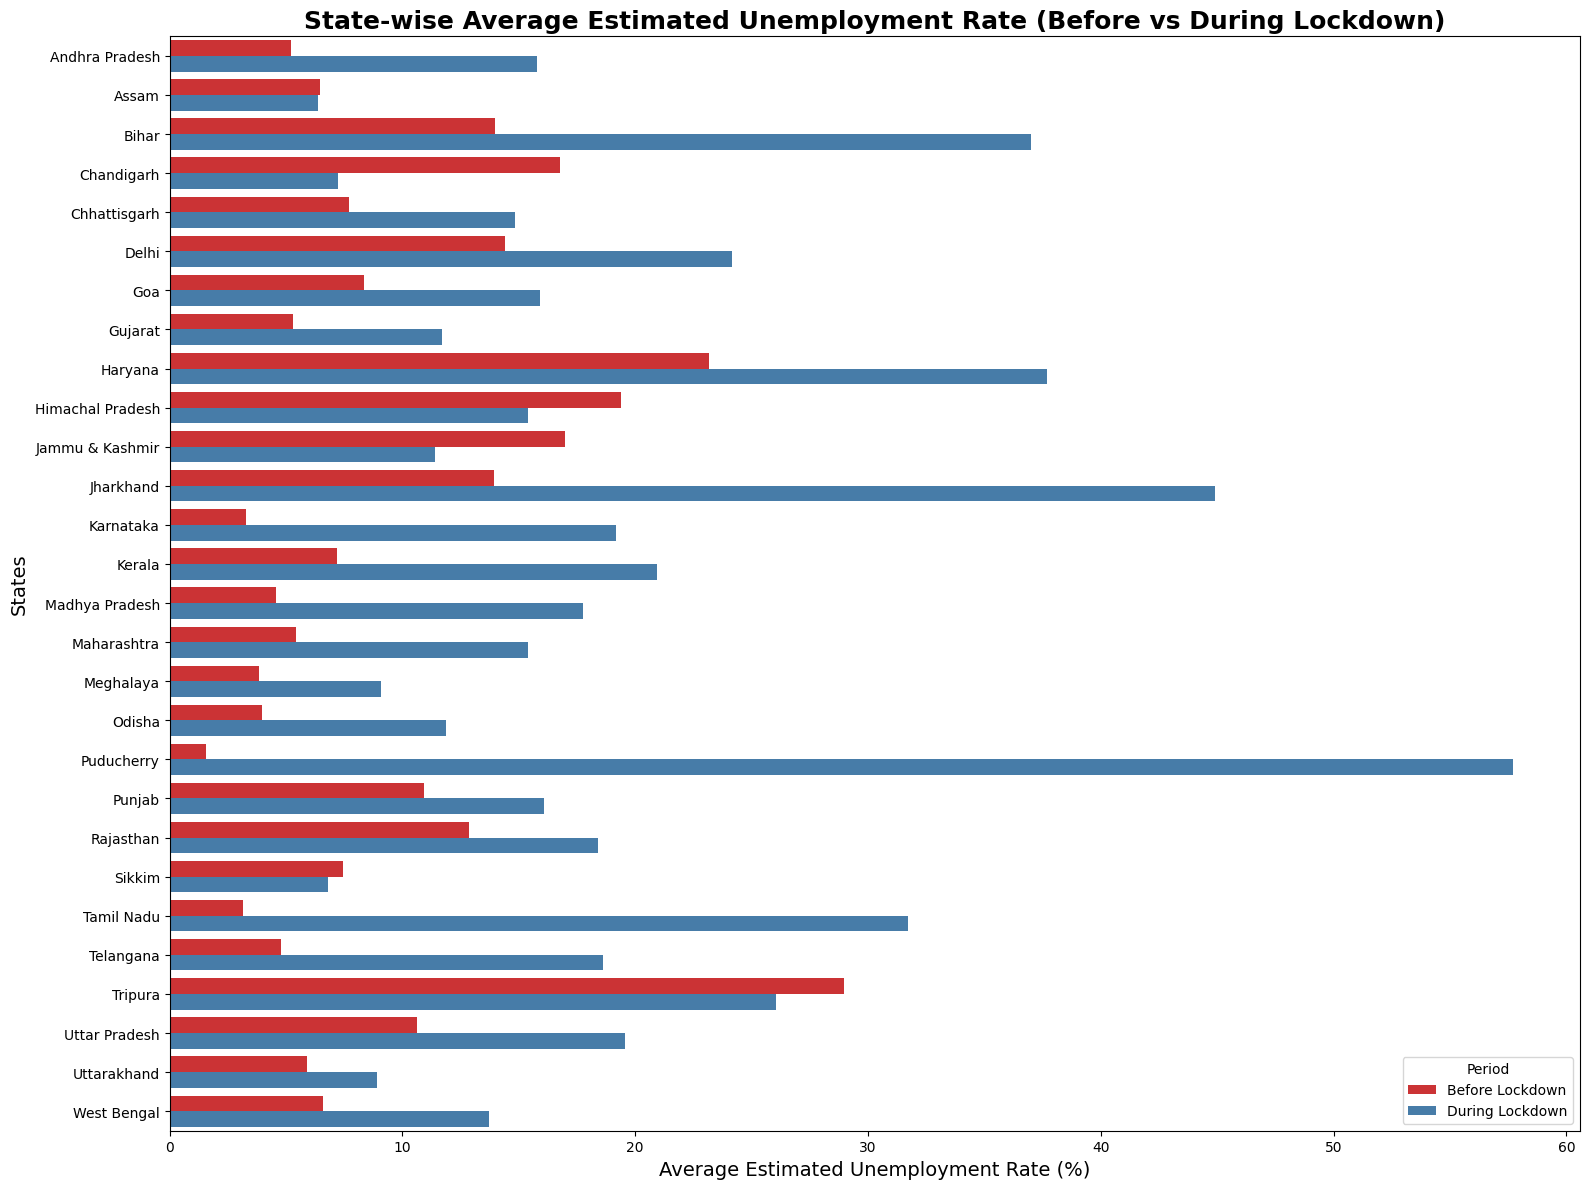

In [ ]:
plt.figure(figsize=(16, 12))

# Prepare combined data
df_before = df.copy()
df_before["Period"] = "Before Lockdown"

df_during = df_ld.copy()
df_during["Period"] = "During Lockdown"

df_combined = pd.concat([df_before, df_during])

# Compute average unemployment per state & period
avg_state = df_combined.groupby(["States", "Period"])["Estimated Unemployment Rate"].mean().reset_index()

# Horizontal grouped bar chart
sns.barplot(
    data=avg_state,
    y="States",
    x="Estimated Unemployment Rate",
    hue="Period",
    palette="Set1"
)

# Improve readability
plt.title("State-wise Average Estimated Unemployment Rate (Before vs During Lockdown)", fontsize=18, weight="bold")
plt.xlabel("Average Estimated Unemployment Rate (%)", fontsize=14)
plt.ylabel("States", fontsize=14)
plt.legend(title="Period", loc="lower right")
plt.tight_layout()
plt.show()


Chart - 3 : Bar Plot for State Wise Estimated Unemployment Rate

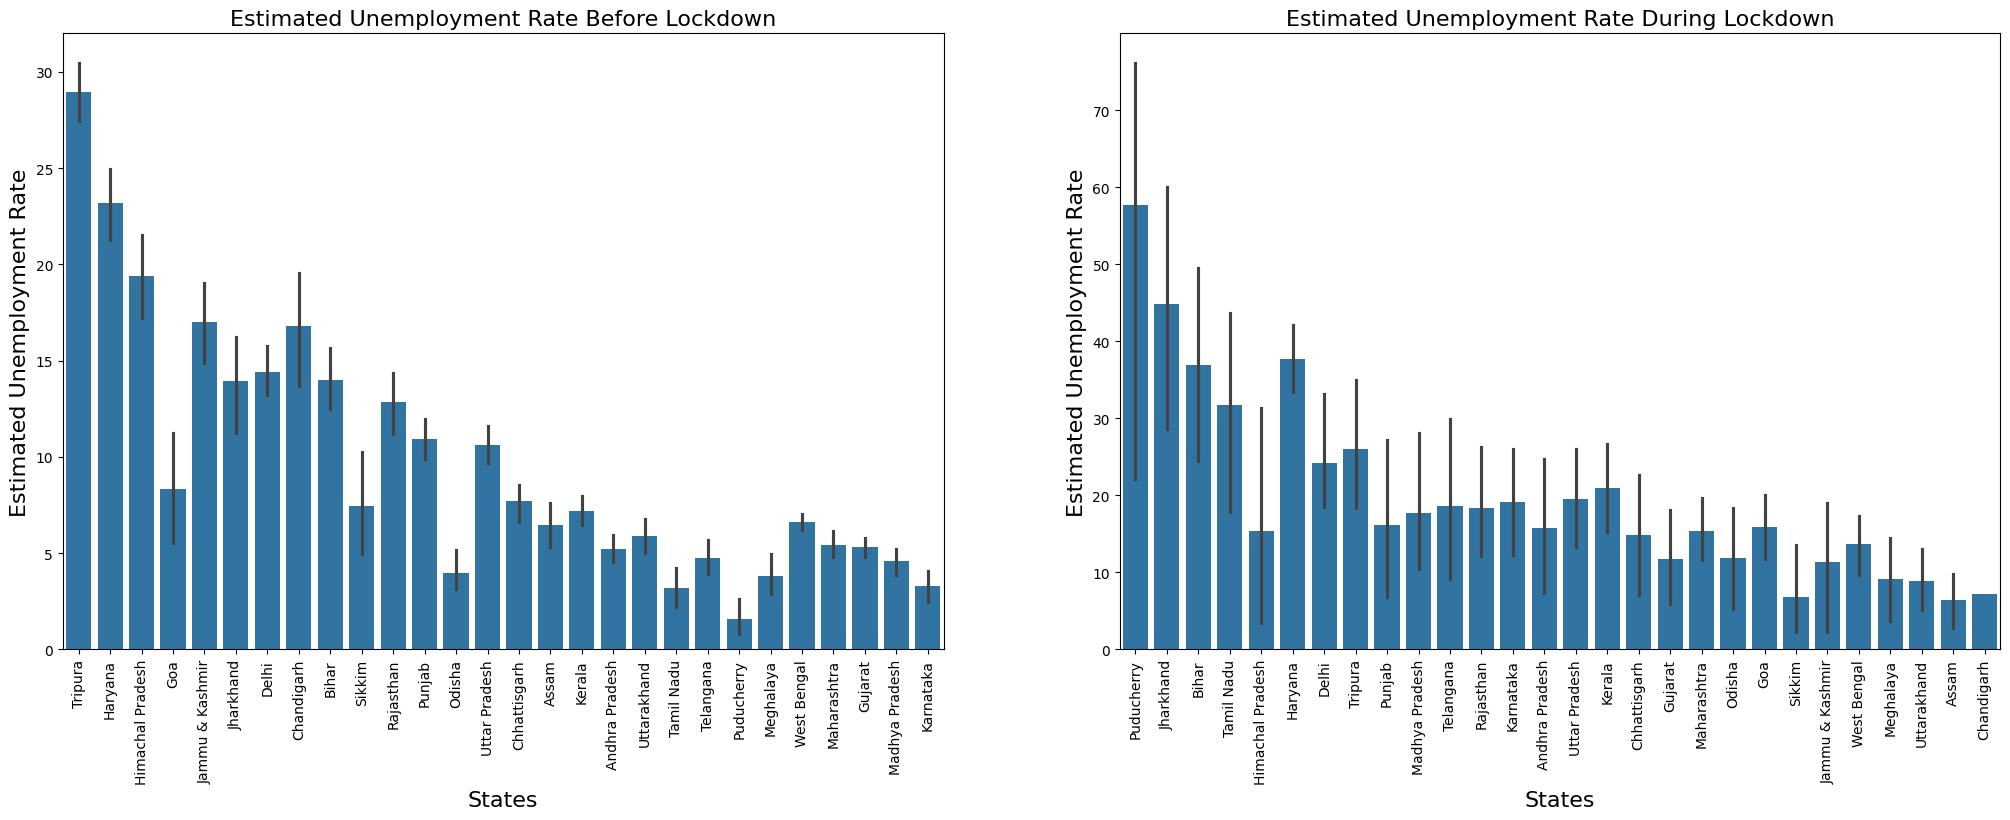

In [ ]:
# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate")
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

Chart - 4 : State Wise Estimated Employed Workforce

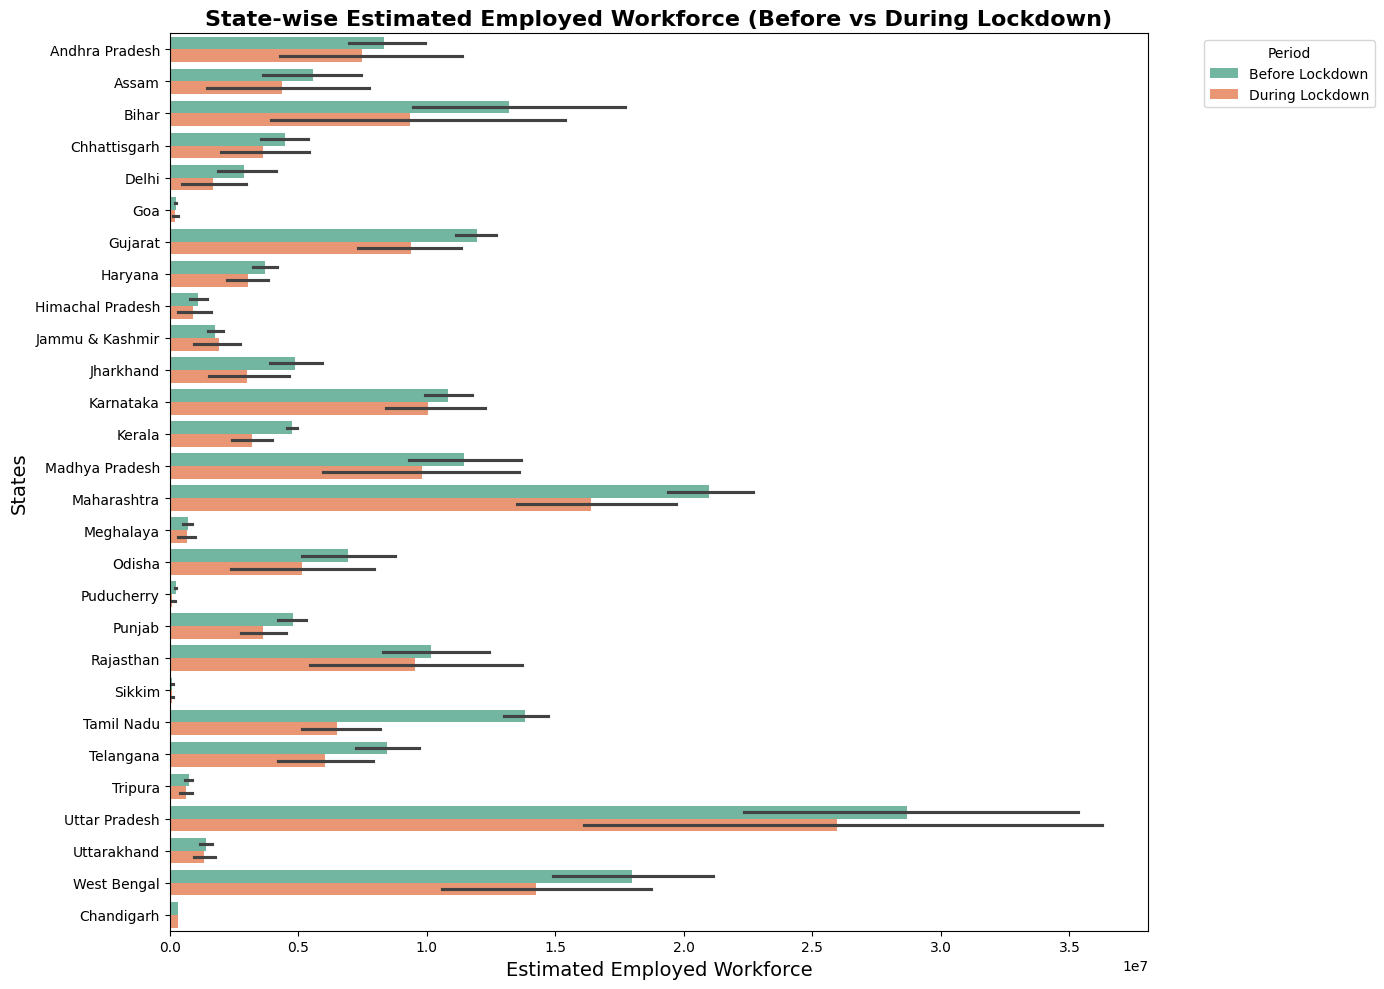

In [ ]:
# Add a Period column
df['Period'] = "Before Lockdown"
df_ld['Period'] = "During Lockdown"

# Combine datasets
df_combined = pd.concat([df[['States','Estimated Employed','Period']], 
                         df_ld[['States','Estimated Employed','Period']]])

# Set figure size
plt.figure(figsize=(14, 10))

# Create grouped horizontal bar chart
sns.barplot(data=df_combined, 
            y="States", 
            x="Estimated Employed", 
            hue="Period", 
            palette="Set2")

# Add labels and title
plt.title("State-wise Estimated Employed Workforce (Before vs During Lockdown)", 
          fontsize=16, fontweight="bold")
plt.xlabel("Estimated Employed Workforce", fontsize=14)
plt.ylabel("States", fontsize=14)

# Move legend outside for clarity
plt.legend(title="Period", bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.tight_layout()
plt.show()


Chart - 5 : State Wise Estimated Labour Participation Rate

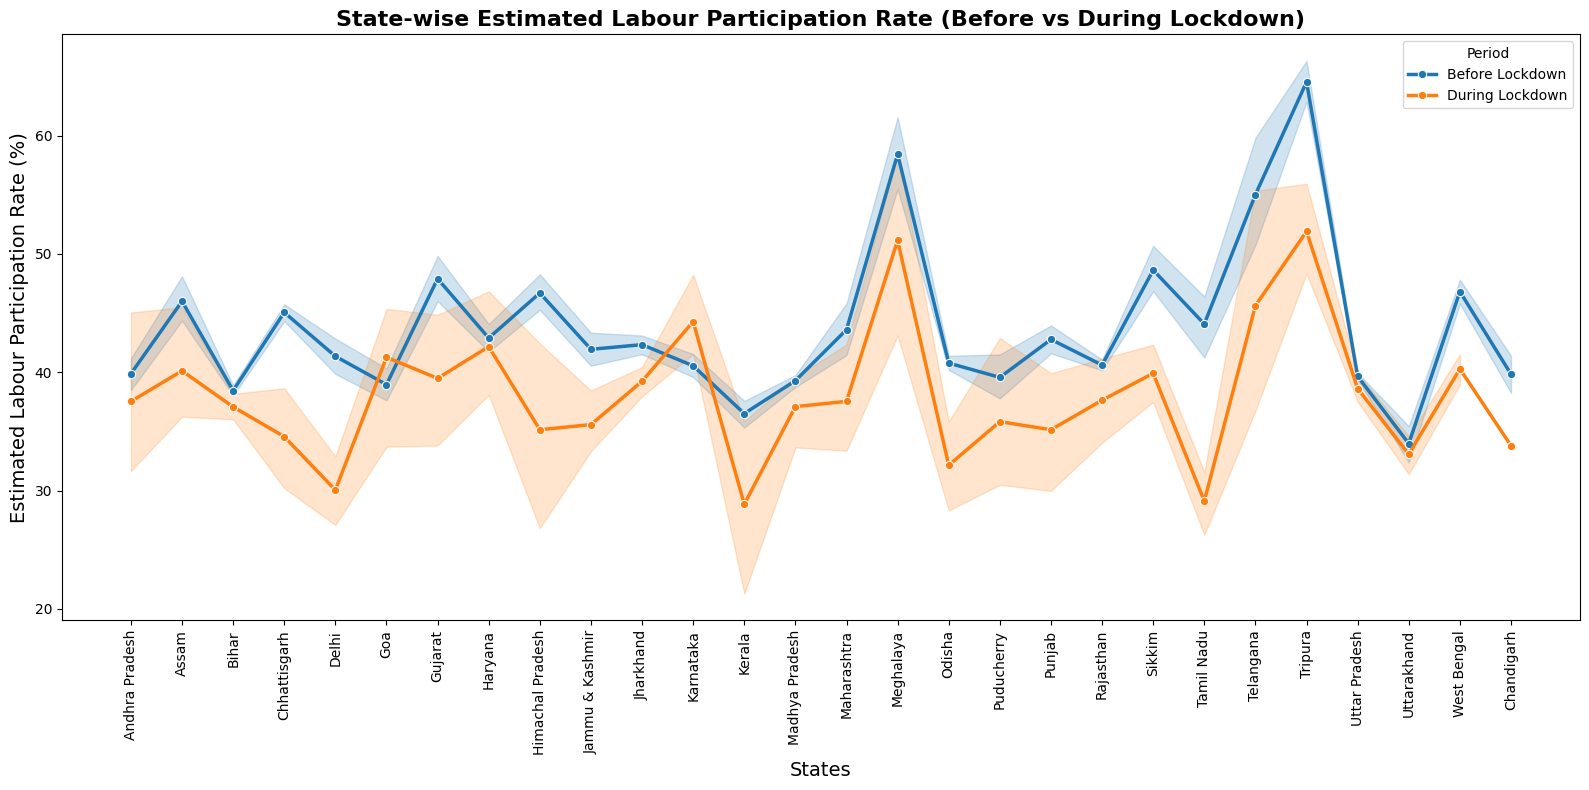

In [ ]:
# Add Period column to both datasets
df['Period'] = "Before Lockdown"
df_ld['Period'] = "During Lockdown"

# Combine into one DataFrame
df_combined = pd.concat([
    df[['States','Estimated Labour Participation Rate','Period']],
    df_ld[['States','Estimated Labour Participation Rate','Period']]
])

# Set figure size
plt.figure(figsize=(16, 8))

# Line plot
sns.lineplot(data=df_combined, 
             x="States", 
             y="Estimated Labour Participation Rate", 
             hue="Period", 
             marker="o", 
             linewidth=2.5)

# Rotate labels for readability
plt.xticks(rotation=90)

# Titles and labels
plt.title("State-wise Estimated Labour Participation Rate (Before vs During Lockdown)", 
          fontsize=16, fontweight="bold")
plt.xlabel("States", fontsize=14)
plt.ylabel("Estimated Labour Participation Rate (%)", fontsize=14)

# Legend placement
plt.legend(title="Period", loc="upper right")

# Layout adjustment
plt.tight_layout()
plt.show()


Chart - 6 Alternative: Pairplot for Relationships

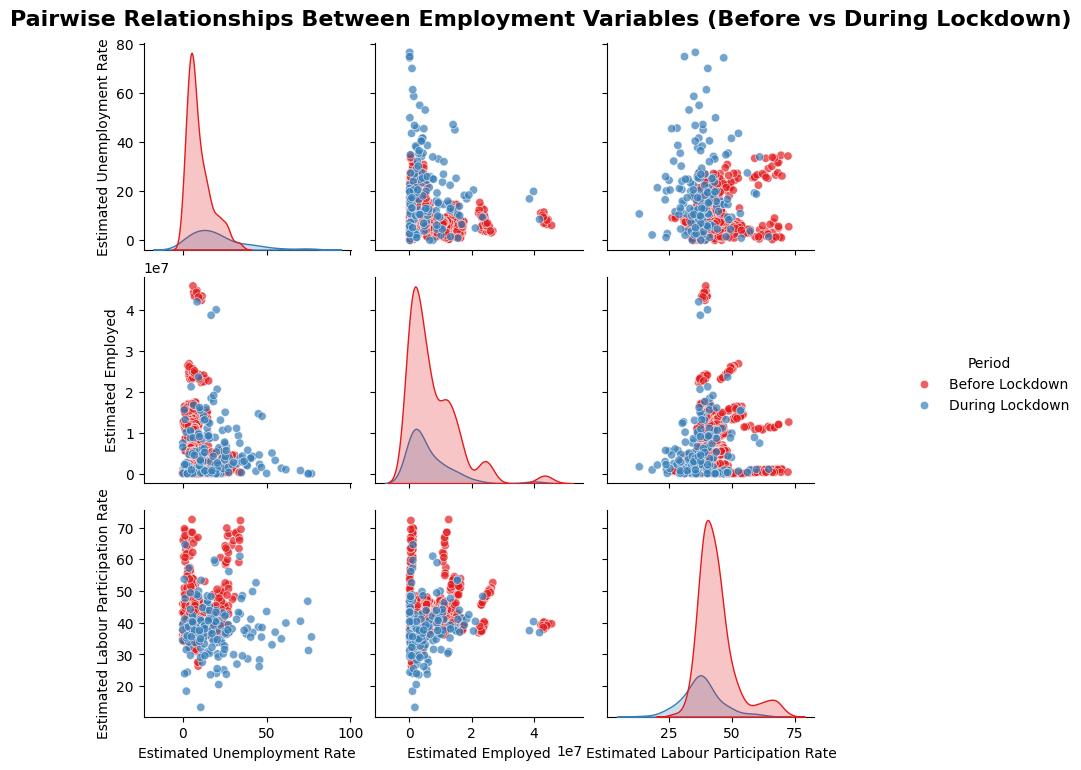

In [ ]:
# Add a label to distinguish periods
df['Period'] = "Before Lockdown"
df_ld['Period'] = "During Lockdown"

# Combine both datasets
df_combined = pd.concat([
    df[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Period']],
    df_ld[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Period']]
])

# Create pairplot
sns.pairplot(df_combined, 
             vars=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'], 
             hue="Period", 
             palette="Set1", 
             diag_kind="kde", 
             plot_kws={'alpha':0.7})

plt.suptitle("Pairwise Relationships Between Employment Variables (Before vs During Lockdown)", 
             fontsize=16, fontweight="bold", y=1.02)
plt.show()
